# **Hotel Reservations Churn Predictive Model**


---


The landscape of hotel reservations has undergone a major transformation with
the advent of online booking platforms, leading to shifts in customer booking patterns. A considerable amount of hotel reservations face cancellations or no-shows, typically attributed to reasons such as changes in plans or scheduling conflicts. The ease of cancellation, often at minimal or no cost, benefits hotel guests but poses challenges for hotels as it may impact revenue negatively.

The dataset was extracted from Kaggle. Here's a link to the dataset: [Hotel Reservations Dataset](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)

Let's come up with a predictive model to predict if customers will honor or cancel their reservations.

# Overview

That data we're dealing is from 2 hotels in Portugal. The data has 36275 observations and 19 features including the target variable booking_status that we're traing to predict. This target variable is a binary variable and indicates whether a customer did honor their reservation or not. We will therefore use different binary classifiers to try to predict the target variable.

The dataset contains the following variables:

*   Booking_ID: unique identifier of each booking
*   no_of_adults: Number of adults
*   no_of_children: Number of Children
*   no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
*   no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
*   type_of_meal_plan: Type of meal plan booked by the customer
*   required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
*   room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels
*   lead_time: Number of days between the date of booking and the arrival date
*   arrival_year: Year of arrival date
*   arrival_month: Month of arrival date
*   arrival_date: Date of the month
*   market_segment_type: Market segment designation.
*   repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
*   no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
*   no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
*   avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
*   no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

Which will let us determine the target variable which is:

*   booking_status: Flag indicating if the booking was canceled or not

# Workflow

1.   Exploratory Data Analysis (EDA)


> EDA helps in understanding the characteristics of the data, identifying patterns, and uncovering insights. It lays the foundation for informed decision-making throughout the data analysis process.


2.   Data Preprocessing


> Cleaning and preparing the data ensure that it is in a suitable format for analysis. This step helps address issues like missing values, outliers, and inconsistencies, ultimately enhancing the quality and reliability of the results.

3. Model Training


> Building and comparing models is essential for finding the most effective algorithm for the given task. It involves training models on the data to learn patterns and relationships, facilitating accurate predictions.

4. Prediction and Model Evaluation


> The ultimate goal is to make predictions using the trained models. Evaluating these predictions against known outcomes helps assess the model's performance and reliability. It also guides any necessary adjustments or improvements.

5. Concluding Remarks and Final Reflections


> Summarizing findings and reflecting on the entire process is crucial for drawing meaningful conclusions. It allows for insights into the effectiveness of the chosen approach, potential areas for improvement, and implications for decision-making.

Importing relevant packages and library and previewing the dataset we're working with

In [78]:
# Basics
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Visualization
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ML
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, RocCurveDisplay

# Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [5]:
df = pd.read_csv('Hotel Reservations.csv')
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

# 1.   Exploratory Data Analysis (EDA)



Let's examine the data types of the columns in the data to ensure that each column is properly encoded.

In [6]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

As we can see, most variables are encoded as numerical variables, a.k.a **int64** and **float64**. We have 4 variables that are encoded as categorical variables, a.k.a **object**. It is no surprise that booking_status is encoded as **object**, since this is a classification problem:
> to predict if a customer will cancel or honor their reservation

We will have to perform one-hot encoding for the categorical variables during the data preprocessing step. One-hot encoding is:

> to convert qualitative information into a numerical format, enabling machine learning models to effectively interpret and utilize these variables for predictive analytics, ensuring accurate and meaningful insights




In [7]:
# Selecting numerical features
numerical_data = df.select_dtypes(include='number')

# Append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

#Selecting categoricalfeatures
categorical_data=df.select_dtypes(include= 'object')
categorical_data.drop('Booking_ID', axis=1, inplace=True)

#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)
print('\n')
print(f'There are {len(categorical_features)} categorical features features:', '\n')
print(categorical_features)

There are 14 numerical features: 

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


There are 4 categorical features features: 

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


Let's examine the descriptive statistics for the numerical variables

In [9]:
numerical_data.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

I don't see any weird numbers or distribution based on this table, but there are some minimum and maximum numbers that indicate that there may be outliers. Let's further examine by plotting the distributions of the numerical variables.

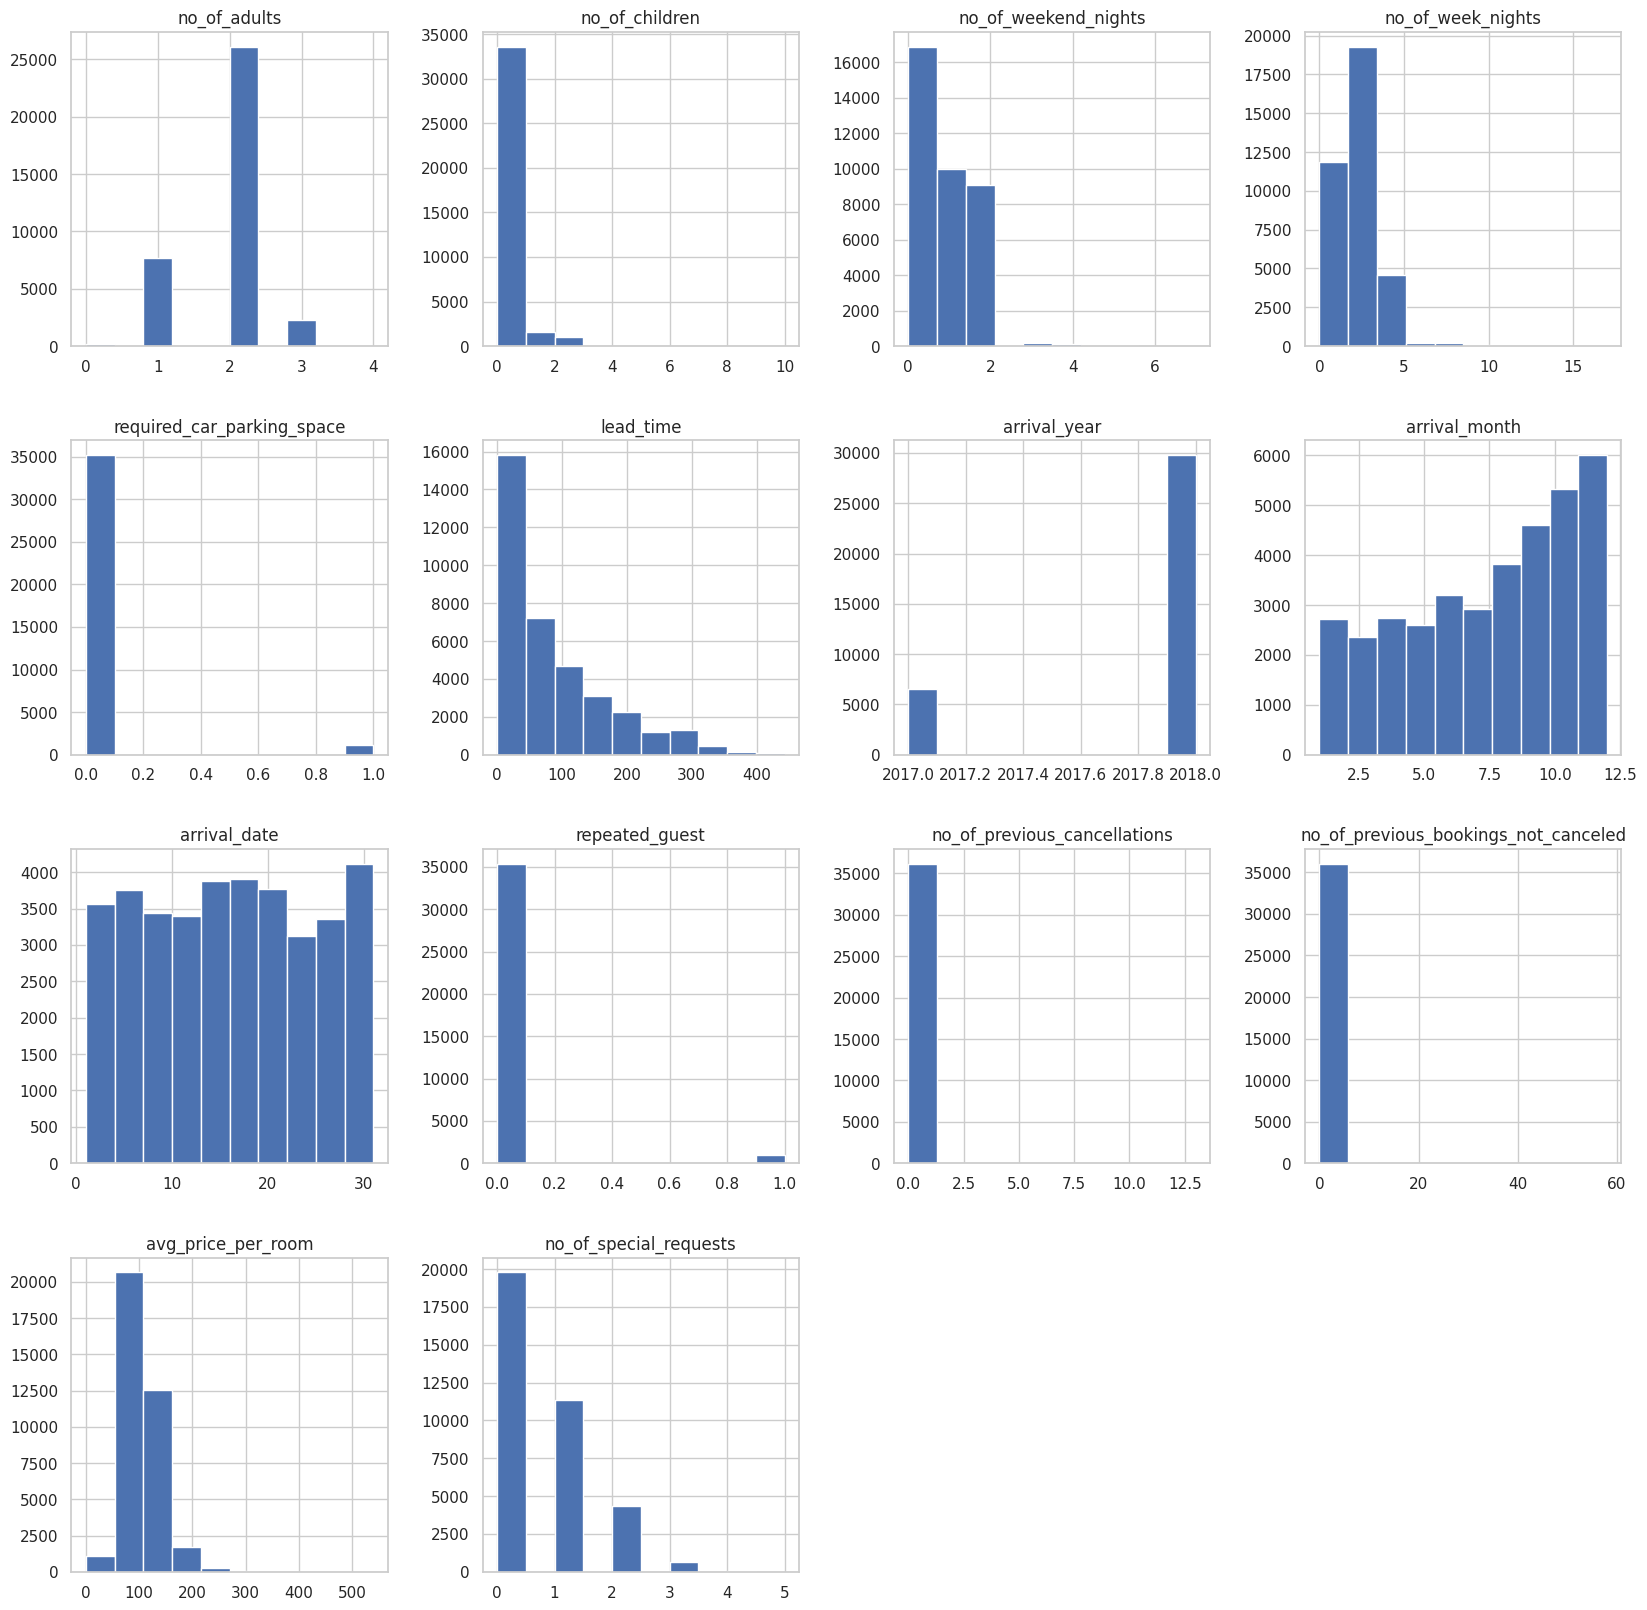

In [41]:
numerical_data.hist(figsize=(20,20),bins=10)
plt.show()

Insights:

*   Most reservations are made for 2 adults and 0 children.
*   Most guests made reservation to stay for the short-term, and do not require any parking space and make any special request.
*   Most guests that made the reservations are new guests. This explains why are there are so many 0 values in no_of_previous_cancellations and no_of_previous_bookings_not_cancelled.
*   The dataset only included reservation data in 2017 and 2018, with the majority of them in 2018
*   Most reservations are made in December, which makes sense as most people go on vacations during this period.









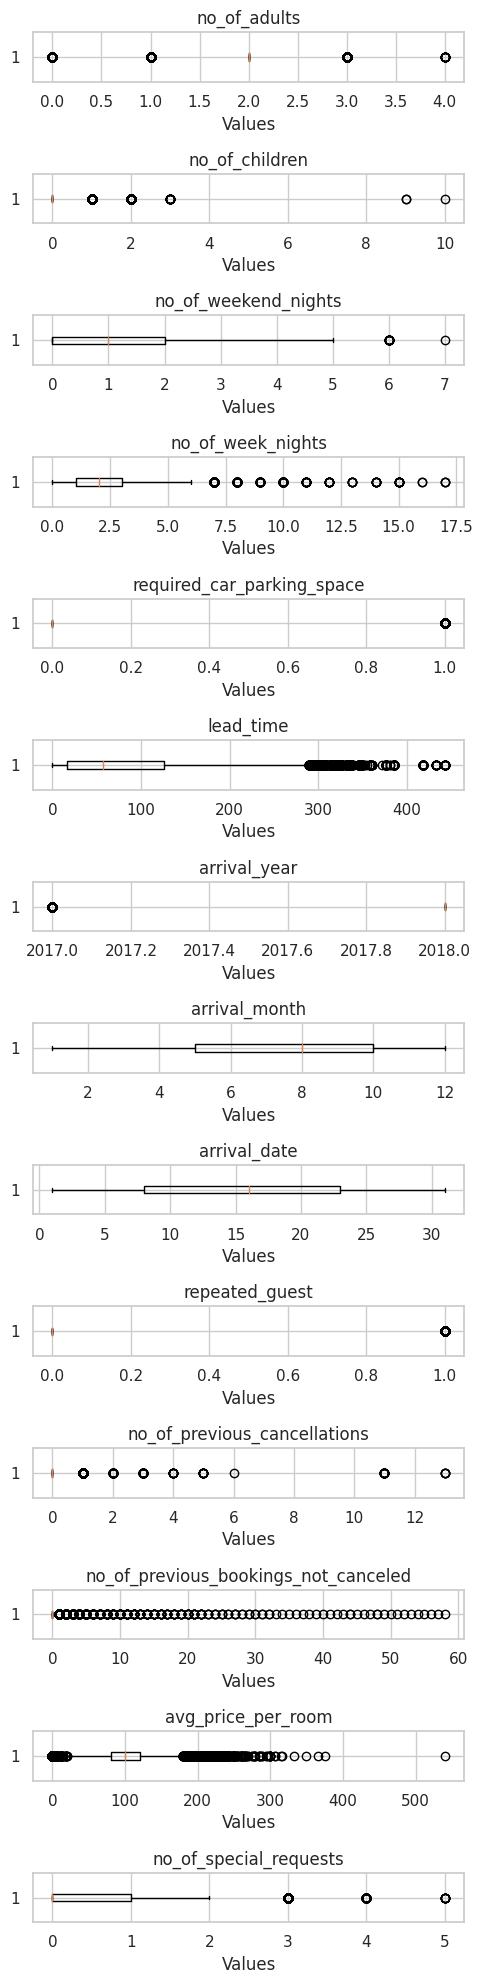

In [49]:
fig, axes = plt.subplots(nrows=len(numerical_data.columns), figsize=(5, 20))

# Iterate through each numerical variable and create a boxplot
for i, column in enumerate(numerical_data.columns):
    axes[i].boxplot(numerical_data[column], vert=False)
    axes[i].set_title(column)
    axes[i].set_xlabel('Values')

plt.tight_layout()
plt.show()

According to the boxplots, there are some outliers in our data. However, I'm planning to keep these outliers in our dataset as some of the outliers could happen in the context of hotel reservations.

Let's examine the distribution of the categorical variables.


Distribution of type_of_meal_plan:
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

Distribution of room_type_reserved:
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

Distribution of market_segment_type:
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

Distribution of booking_status:
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64


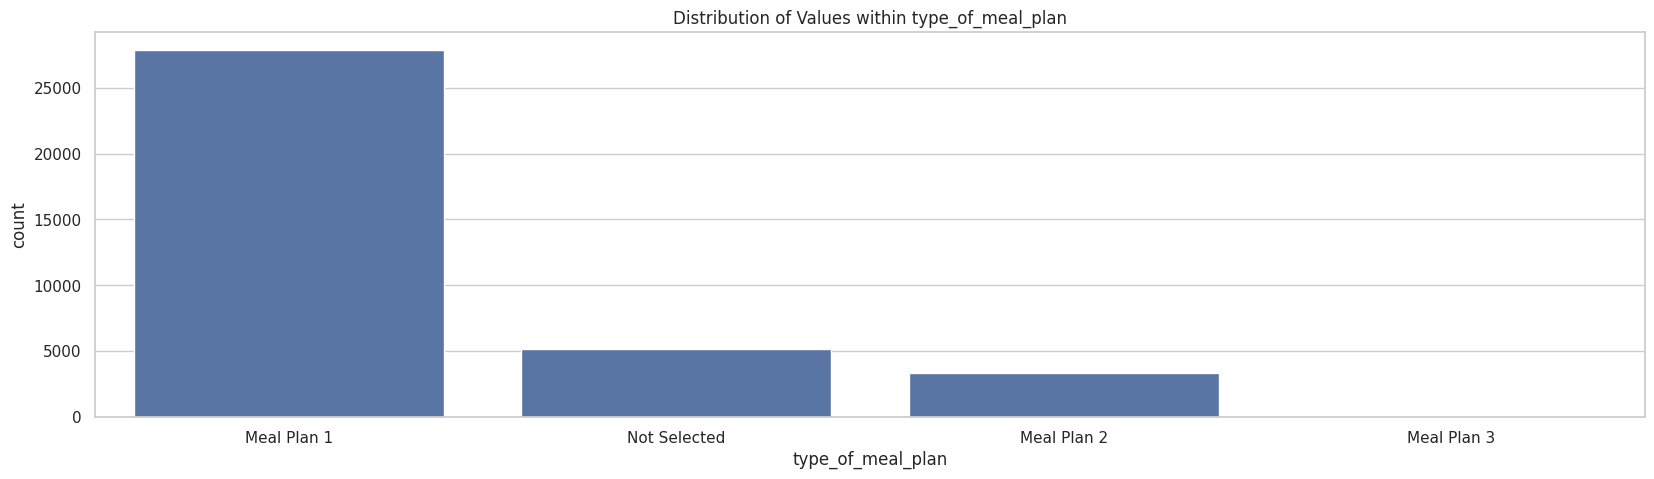

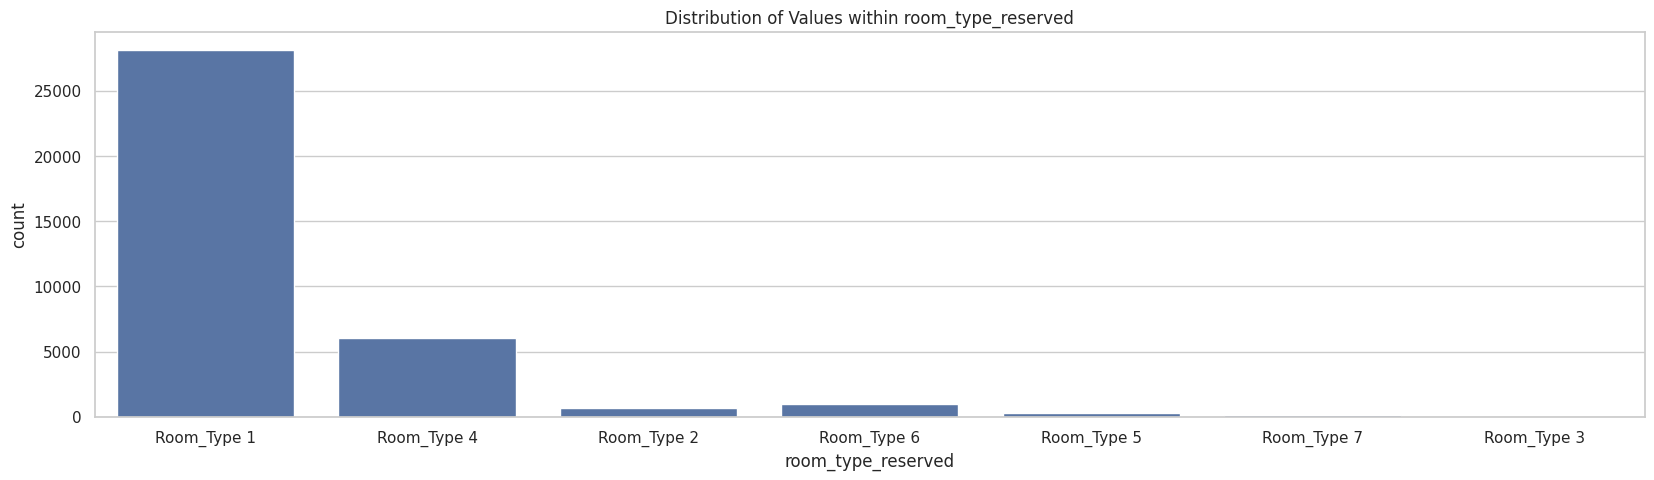

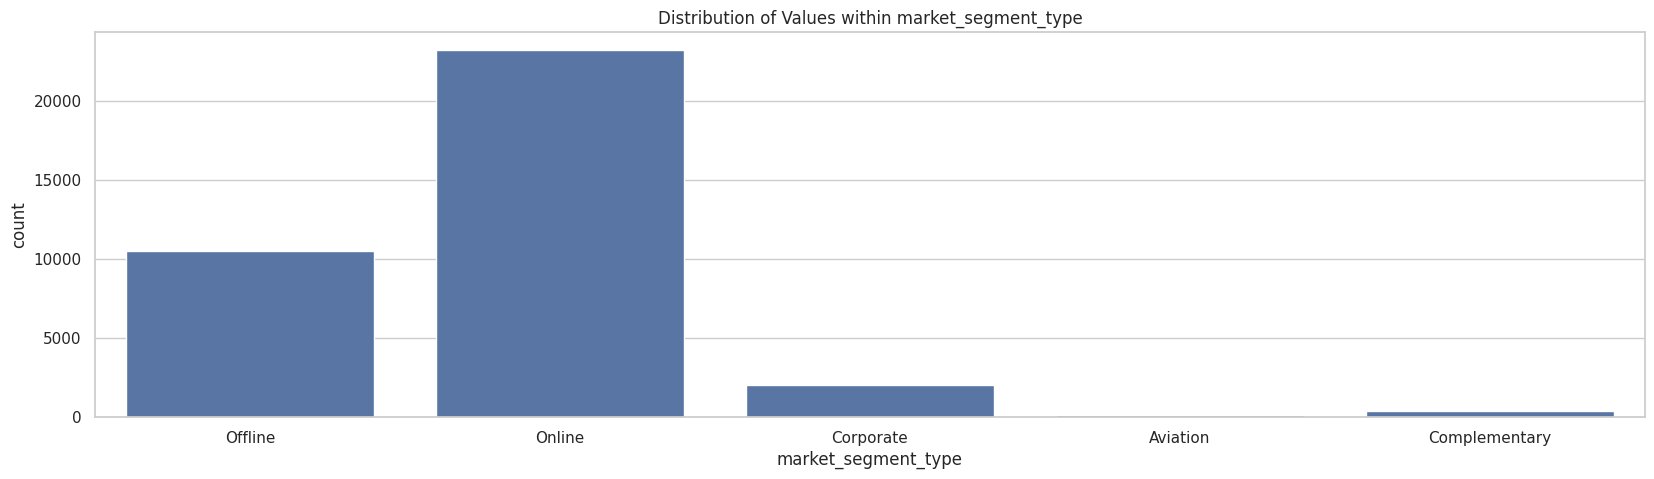

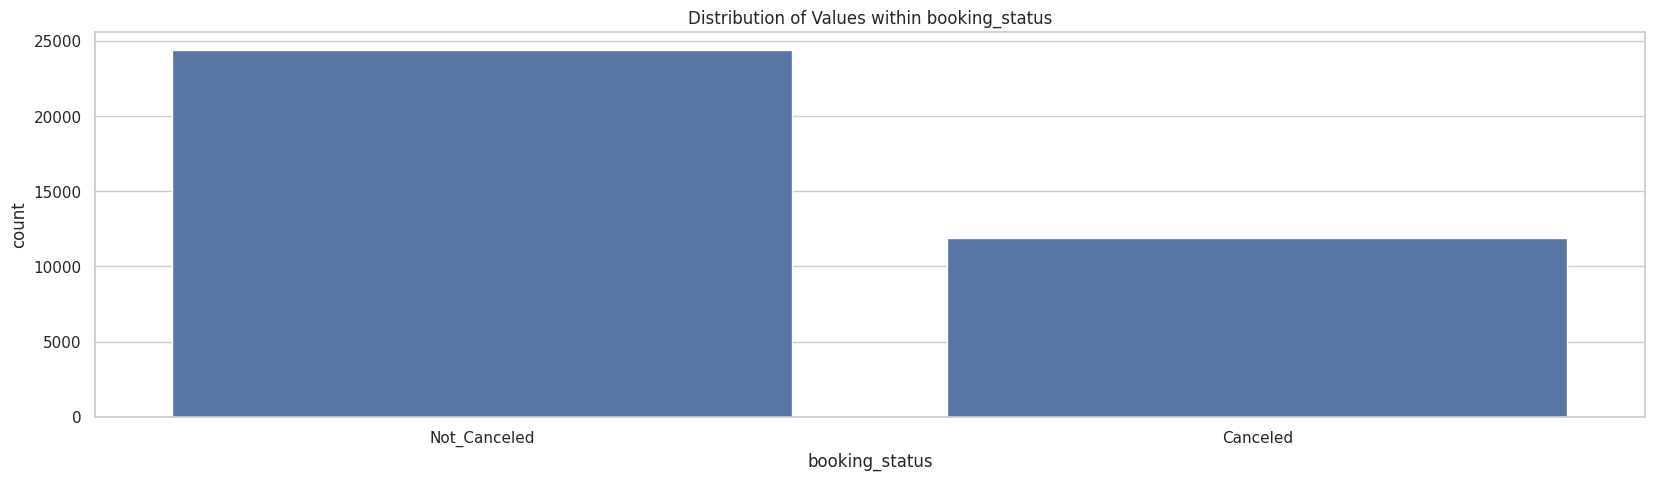

In [71]:
# Display value counts for each categorical variable
for column in categorical_data:
    print(f"\nDistribution of {column}:")
    print(categorical_data[column].value_counts())

# Plotting the distribution of values within each categorical_variable
for col in categorical_data:
  plt.figure(figsize=(20, 5))
  sns.countplot(x=col, data=categorical_data)
  plt.title(f'Distribution of Values within {col}')
  plt.show()

Insights:


*   Most reservations are made with Meal Plan 1, with some not opting for any meal plan and some opting for Meal Plan 2.
*   Most reservations are made for Room_Type 1, with some made for Room_Type 4.
*   Most reservations are made online, which is not a surprise considering the convenience of online booking.

Balance of target variable: booking_status
> 67% of the reservations are not canceled, which suggest a slight imbalance
between reservation that are not canceled and reservations that are canceled.


> There are techniques to handle imbalanced target variable, such as resampling methods (oversampling the minority class, undersampling the majority class), and employing specialized algorithms designed for imbalanced datasets.

> However, we will be using evaluation metrics such as precision, recall, and F1-score as these metrics provide a more nuanced understanding of a model's performance, especially in situations where one class significantly outnumbers the other.












Let's now examine for missing and zero values for both the numerical and categorical variables. We would also like to examine the cardinality of the categorical variables.

> Cardinality pertains to the quantity of distinct values within categorical variables.



In [75]:
# Defining a function to calculate the unique values, missing values, zero values of a dataframe
def missing_values(data):
  df = pd.DataFrame()
  for col in list(data):
    unique_values = data[col].unique()
    try:
      unique_values = np.sort(unique_values)
    except:
      pass
    nans = round(pd.isna(data[col]).sum()/data.shape[0]*100, 1)
    zeros = round((data[col] == 0).sum()/data.shape[0]*100, 1)
    #empty = round((data[data[col]] == '').sum()/data.shape[0]*100,1)
    df = df.append(pd.DataFrame([col, len(unique_values), nans,  zeros]).T, ignore_index = True)
  return df.rename(columns = {0: 'variable',
1: 'Unique values',
2: 'Nan %',
3: 'zeros %',
4: 'empty'}).sort_values('Nan %', ascending=False)

In [76]:
missing_values(numerical_data)

<ipython-input-75-0f38e8e52257>:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



variable Unique values Nan % zeros %
0                           no_of_adults             5   0.0     0.4
1                         no_of_children             6   0.0    92.6
2                   no_of_weekend_nights             8   0.0    46.5
3                      no_of_week_nights            18   0.0     6.6
4             required_car_parking_space             2   0.0    96.9
5                              lead_time           352   0.0     3.6
6                           arrival_year             2   0.0     0.0
7                          arrival_month            12   0.0     0.0
8                           arrival_date            31   0.0     0.0
9                         repeated_guest             2   0.0    97.4
10          no_of_previous_cancellations             9   0.0    99.1
11  no_of_previous_bookings_not_canceled            59   0.0    97.8
12                    avg_price_per_room          3930   0.0     1.5
13                no_of_special_requests             6   0.0    54.5

There are no missing values within the numerical variables. There are some numerical variables with plenty of zero values, which coincides with our insights from the examining the distribution of the numerical variables.

In [77]:
missing_values(categorical_data)

<ipython-input-75-0f38e8e52257>:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



variable Unique values Nan % zeros %
0    type_of_meal_plan             4   0.0     0.0
1   room_type_reserved             7   0.0     0.0
2  market_segment_type             5   0.0     0.0
3       booking_status             2   0.0     0.0

There are no missing values within the categorical variables. There also seems to be relatively low cardinality within our categorical variables. This is crucial as encoding categorical variables for model training (e.g., one-hot encoding) is more efficient with low cardinality. With high cardinality, the number of resulting features can become large, potentially causing memory and computation issues.

Let's now examine for multicollinearity

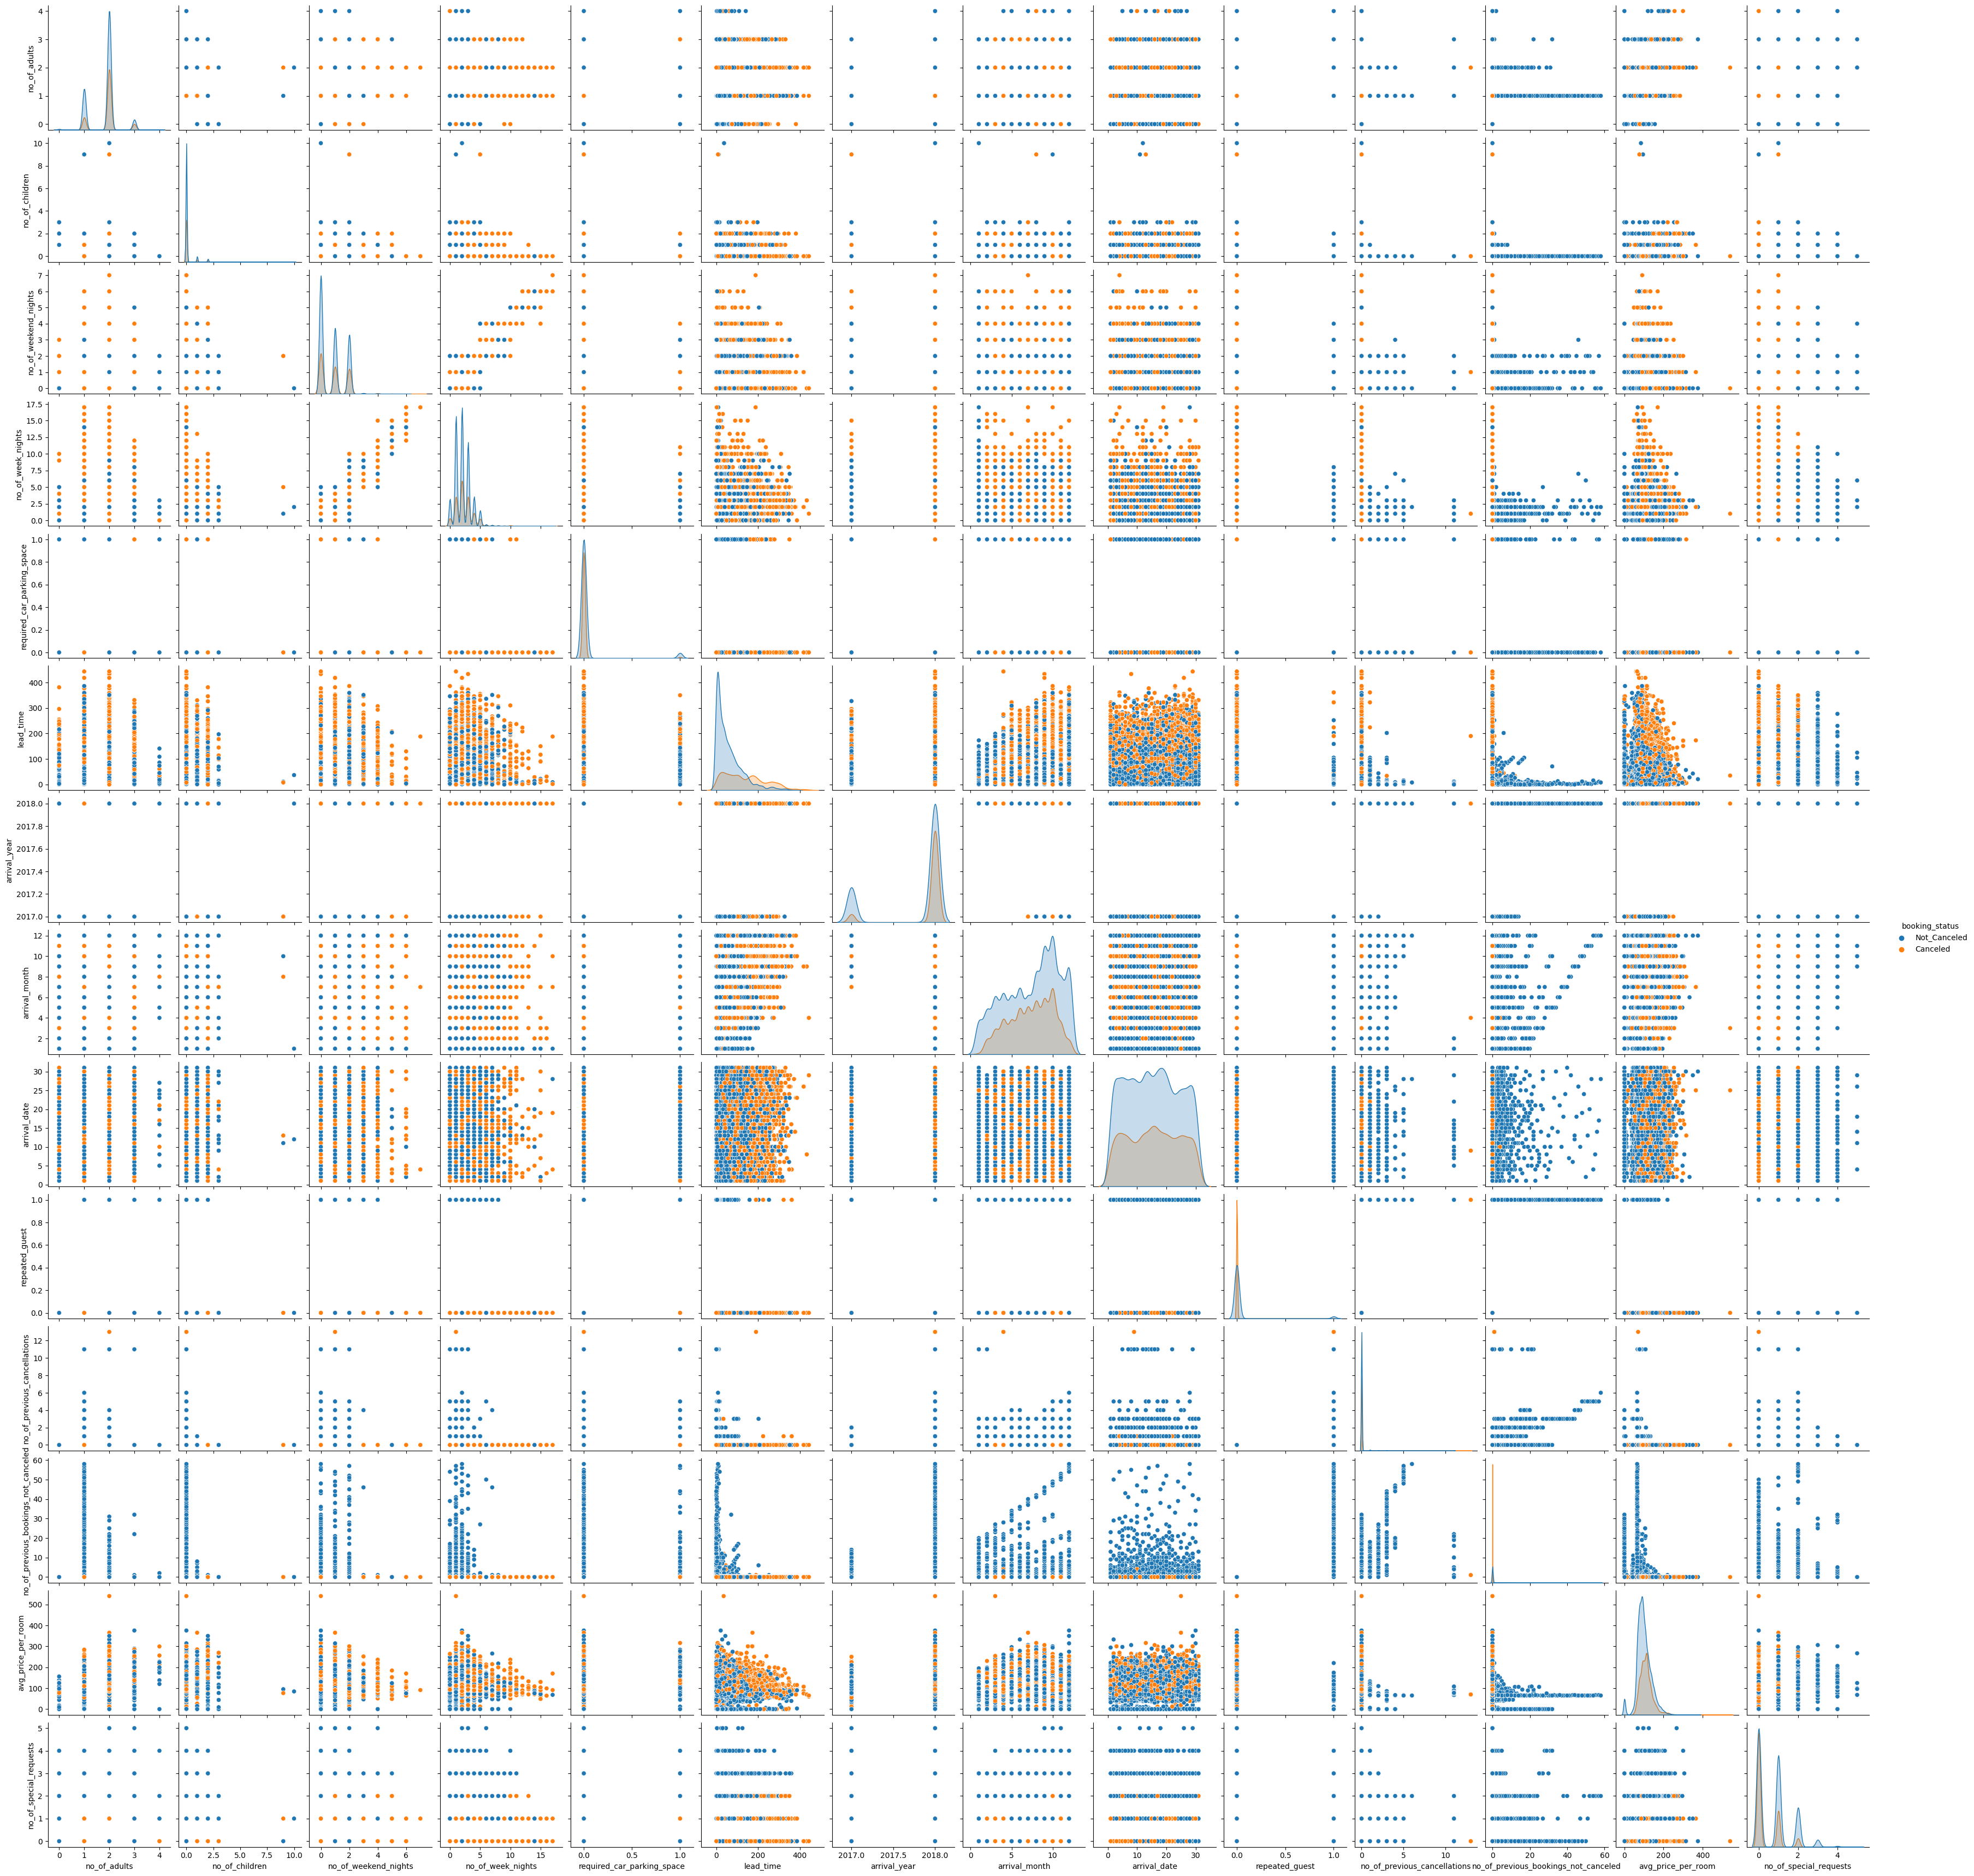

In [ ]:
sns.pairplot(data = df, hue='booking_status')
plt.show()

In [ ]:
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cols = one_hot_encoder.fit_transform(df[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']])

# Get the feature names for the one-hot encoded columns
encoded_col_names = one_hot_encoder.get_feature_names_out(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])

# Create a DataFrame with the encoded columns and set the column names
encoded_df = pd.DataFrame(encoded_cols, columns=encoded_col_names)

# Concatenate the new DataFrame with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical columns
df.drop(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], axis=1, inplace=True)

In [ ]:
df['booking_status_b'] = df['booking_status'].map({'Not_Canceled': 1, 'Canceled': 0})
df.drop(['booking_status'], axis=1, inplace=True)

In [ ]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
0                  2                           0        224          2017   
1                  3                           0          5          2018   
2                  1                           0          1          2018   
3                  2                           0        211          2018   
4                  1                           0         48          2018   

   arrival_month  arrival_date  ...  room_type_reserved_Room_Type 3  \
0             10             2  ...                             0.0   
1             11             6  ...                             0.0   
2              2            28  ...                             0.0   
3              5            20  ...                             0.0   
4              4            11  ...                             0.0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                                0.0                            0.0   
1                                0.0                            0.0   
2                                0.0                            0.0   
3                                0.0                            0.0   
4                                0.0                            0.0   

   market_segment_type_Offline  market_segment_type_Online  booking_status_b  
0                          1.0                         0.0                 1  
1                          0.0                         1.0                 1  
2                          0.0                         1.0                 0  
3                          0.0                         1.0                 0  
4                          0.0                         1.0                 0  

[5 rows x 29 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   lead_time                             36275 non-null  int64  
 7   arrival_year                          36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   arrival_date                          36275 non-null  int64  
 10  repeated_guest                        36275 non-null  int64  
 11  no_of_previous_

In [ ]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
required_car_parking_space              0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
type_of_meal_plan_Meal Plan 2           0
type_of_meal_plan_Meal Plan 3           0
type_of_meal_plan_Not Selected          0
room_type_reserved_Room_Type 2          0
room_type_reserved_Room_Type 3          0
room_type_reserved_Room_Type 4          0
room_type_reserved_Room_Type 5          0
room_type_reserved_Room_Type 6          0
room_type_reserved_Room_Type 7    

In [ ]:
df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   
type_of_meal_plan_Meal Plan 2         36275.0     0.091110   0.287769     0.0   
type_of_meal_plan_Meal Plan 3         36275.0     0.000138   0.011740     0.0   
type_of_meal_plan_Not Selected        36275.0     0.141420   0.348459     0.0   
room_type_reserved_Room_Type 2        36275.0     0.019076   0.136796     0.0   
room_type_reserved_Room_Type 3        36275.0     0.000193   0.013890     0.0   
room_type_reserved_Room_Type 4        36275.0     0.166975   0.372958     0.0   
room_type_reserved_Room_Type 5        36275.0     0.007305   0.085159     0.0   
room_type_reserved_Room_Type 6        36275.0     0.026630   0.161001     0.0   
room_type_reserved_Room_Type 7        36275.0     0.004356   0.065854     0.0   
market_segment_type_Complementary     36275.0     0.010779   0.103261     0.0   
market_segment_type_Corporate         36275.0     0.055603   0.229157     0.0   
market_segment_type_Offline           36275.0     0.290227   0.453873     0.0   
market_segment_type_Online            36275.0     0.639945   0.480023     0.0   
booking_status_b                      36275.0     0.672364   0.469358     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0  
type_of_meal_plan_Meal Plan 2            0.0     0.00     0.0     1.0  
type_of_meal_plan_Meal Plan 3            0.0     0.00     0.0     1.0  
type_of_meal_plan_Not Selected           0.0     0.00     0.0     1.0  
room_type_reserved_Room_Type 2           0.0     0.00     0.0     1.0  
room_type_reserved_Room_Type 3           0.0     0.00     0.0     1.0  
room_type_reserved_Room_Type 4           0.0     0.00     0.0     1.0  
room_type_reserved_Room_Type 5           0.0     0.00     0.0     1.0  
room_type_reserved_Room_Type 6           0.0     0.00     0.0     1.0  
room_type_reserved_Room_Type 7    

/var/folders/8t/p7jm7ly91bdgd_rbschm96xr0000gn/T/ipykernel_61249/2628785363.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Reds')


<Axes: >

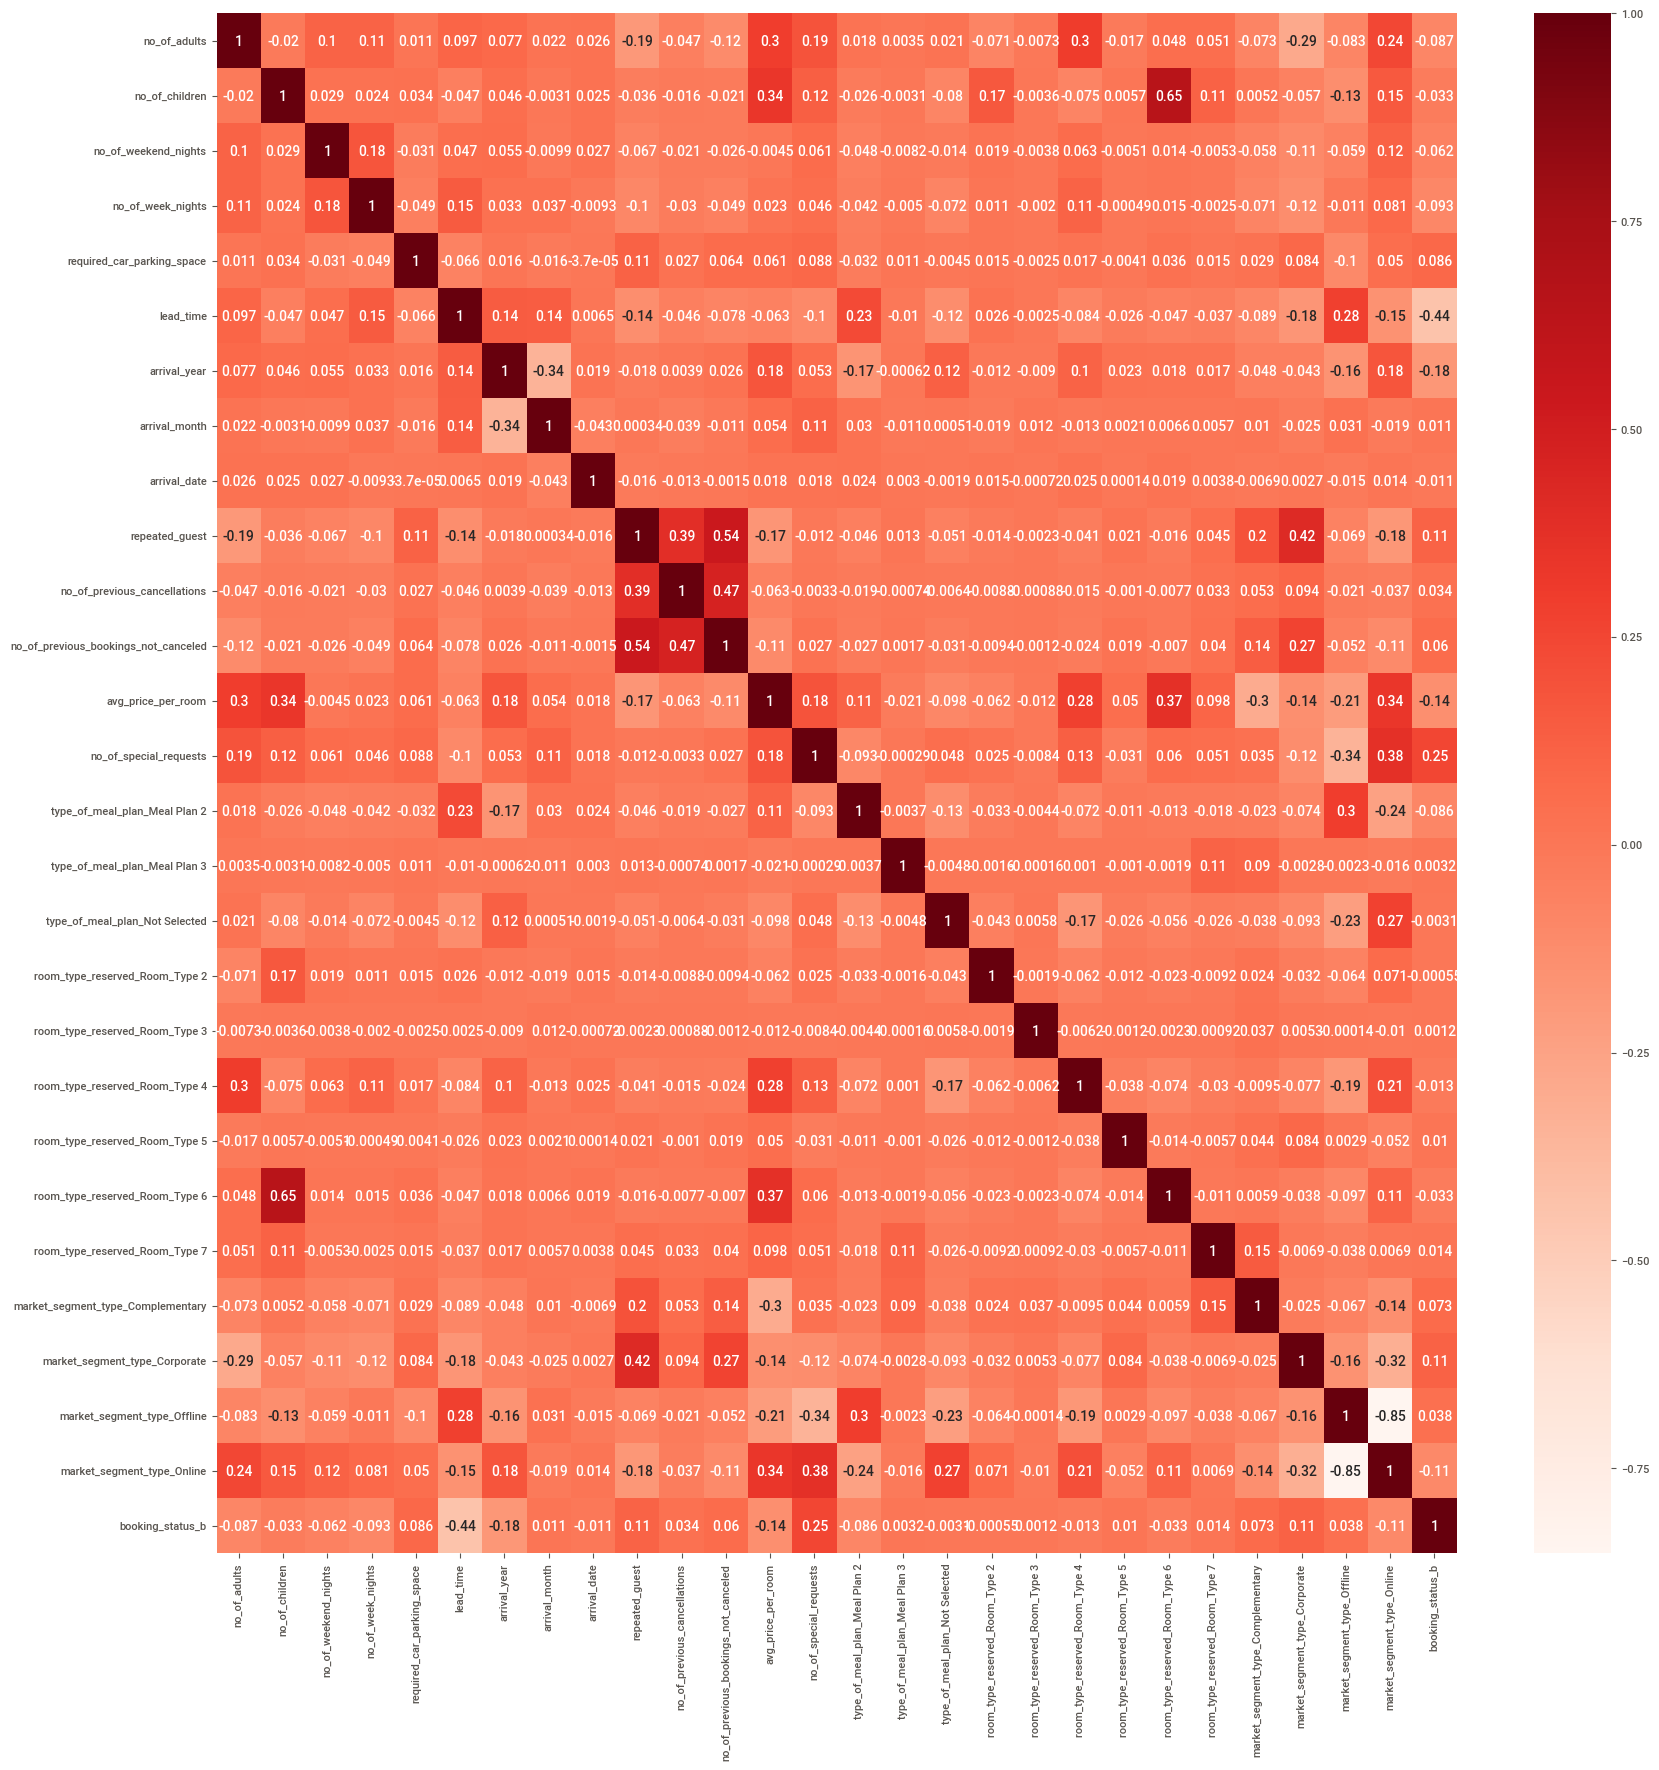

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Reds')

/var/folders/8t/p7jm7ly91bdgd_rbschm96xr0000gn/T/ipykernel_61249/3172144472.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1 = df.corr('pearson')[['booking_status_b']].sort_values(by='booking_status_b', ascending=False)
/var/folders/8t/p7jm7ly91bdgd_rbschm96xr0000gn/T/ipykernel_61249/3172144472.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr2 = df.corr('spearman')[['booking_status_b']].sort_values(by='booking_status_b', ascending=False)
/var/folders/8t/p7jm7ly91bdgd_rbschm96xr0000gn/T/ipykernel_61249/3172144472.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will de

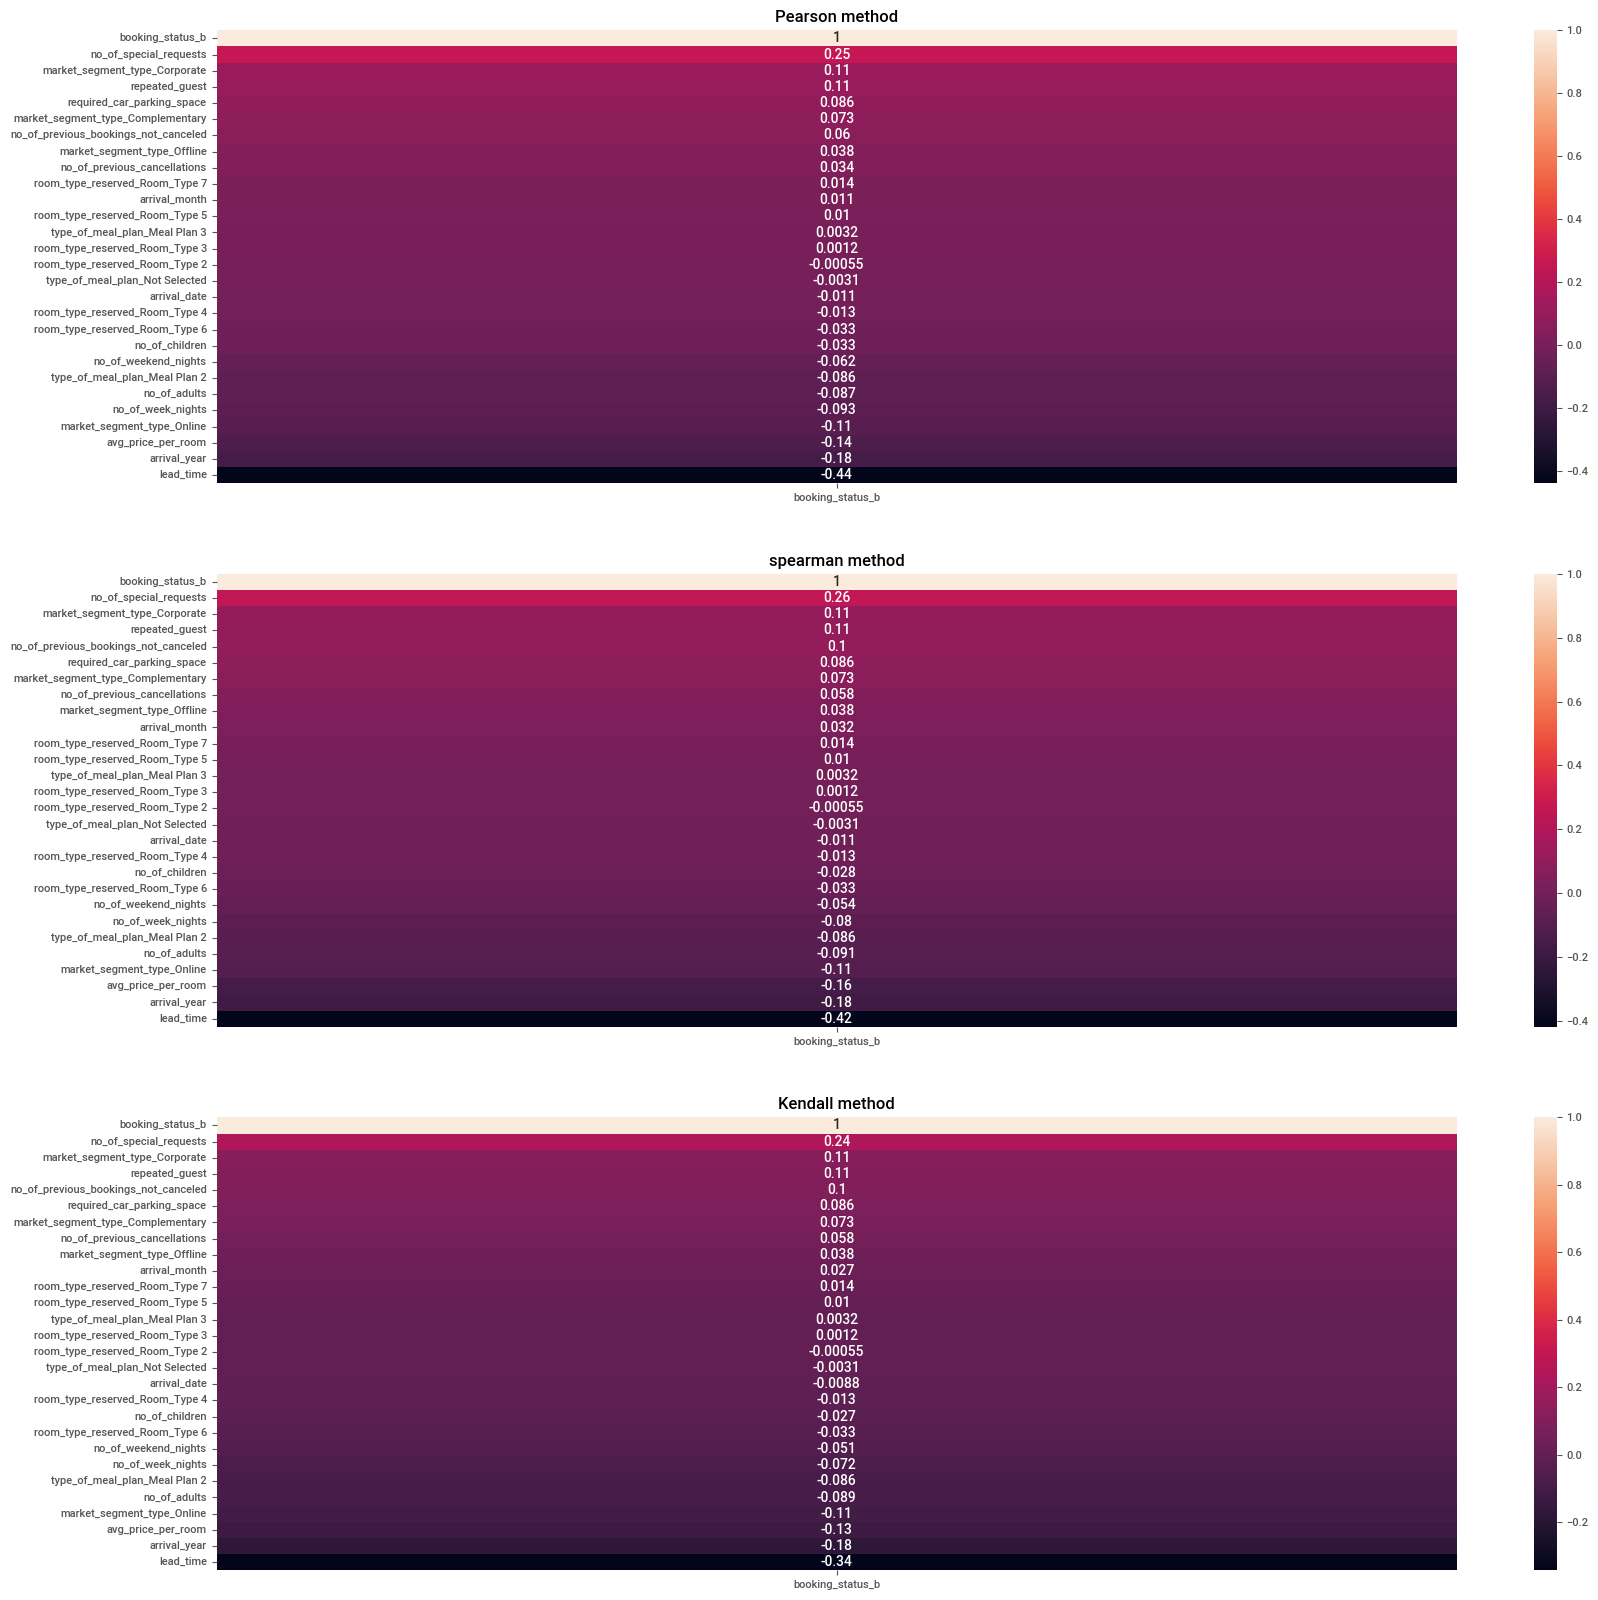

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(20, 20))
## Correlation coefficient using different methods
corr1 = df.corr('pearson')[['booking_status_b']].sort_values(by='booking_status_b', ascending=False)
corr2 = df.corr('spearman')[['booking_status_b']].sort_values(by='booking_status_b', ascending=False)
corr3 = df.corr('kendall')[['booking_status_b']].sort_values(by='booking_status_b', ascending=False)

#setting titles for each plot
ax[0].set_title('Pearson method')
ax[1].set_title('spearman method')
ax[2].set_title('Kendall method')
## Generating heatmaps of each methods
sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

plt.show()

In [ ]:
#check Imbalance in data

#group instances based on the classes in OUTCOME variable
class_counts=df.groupby("booking_status_b").size()

columns=['booking status','count','percentage']
outcome=[0,1]
count=list()
percentage=list()

#Calculate the percentage of each value of the OUTCOME variable from total
for val in range(2):
    count.append(class_counts[val])
    percent=(class_counts[val]/36275)*100
    percentage.append(percent)

# Convert the calulated values into a dataframe
imbalance_df=pd.DataFrame(list(zip(outcome,count,percentage)),columns=columns)
imbalance_df

booking status  count  percentage
0               0  11885   32.763611
1               1  24390   67.236389

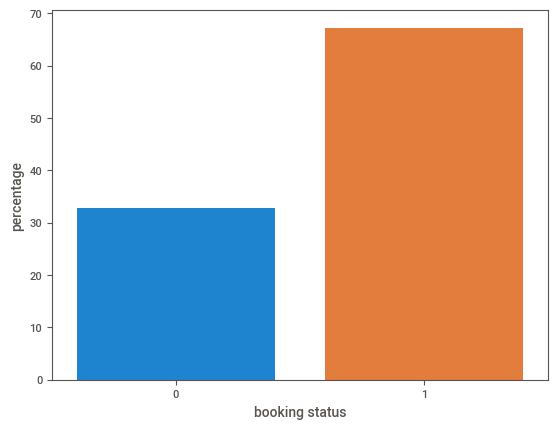

In [ ]:
sns.barplot(data=imbalance_df,x=imbalance_df['booking status'],y=imbalance_df['percentage'])
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   lead_time                             36275 non-null  int64  
 7   arrival_year                          36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   arrival_date                          36275 non-null  int64  
 10  repeated_guest                        36275 non-null  int64  
 11  no_of_previous_

In [ ]:
X = df.drop(["Booking_ID", "booking_status_b"], axis=1)
y = df['booking_status_b']

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status_b, Length: 36275, dtype: int64

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

column_names = [f'Feature_{i}' for i in range(1, 21)]
# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

# Initialize RFECV with Random Forest as estimator and cross-validation folds
rfecv = RFECV(estimator=rf_model, cv=5)

# Fit RFECV on the training data
rfecv.fit(X_train, y_train)

# Get selected features and transform the data
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

# Train a new Random Forest model using selected features
rf_model_selected = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# Evaluate the model on the test set
accuracy = rf_model_selected.score(X_test_selected, y_test)
print(f"Accuracy on test set with selected features: {accuracy:.4f}")
column_names = [X.columns[i] for i in range(0, X.shape[1])]
selected_features_mask = rfecv.support_

# Get the indices of selected features
selected_feature_indices = [i for i, selected in enumerate(selected_features_mask) if selected]

# Get the names of the selected features (if you have column names)
selected_feature_names = [column_names[i] for i in selected_feature_indices]
print('Selected Features:')
print(selected_feature_names, sep = ", ")

Accuracy on test set with selected features: 0.9060
Selected Features:
['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


In [ ]:
# Assuming rf_model_selected is your trained Random Forest model and X_test_selected are the selected features of the test set
# Predictions
y_pred = rf_model_selected.predict(X_test_selected)

# Precision, Recall, F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, rf_model_selected.predict_proba(X_test_selected)[:, 1])
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      2416
           1       0.92      0.95      0.93      4839

    accuracy                           0.91      7255
   macro avg       0.90      0.89      0.89      7255
weighted avg       0.91      0.91      0.91      7255


ROC-AUC Score: 0.9604

Confusion Matrix:
[[1999  417]
 [ 265 4574]]


In [ ]:
# Assuming conf_matrix is the confusion matrix obtained from the model evaluation
tn, fp, fn, tp = conf_matrix.ravel()

# True Positive Rate (Sensitivity)
tpr = tp / (tp + fn)
print(f"True Positive Rate (Sensitivity): {tpr:.4f}")

# False Positive Rate
fpr = fp / (fp + tn)
print(f"False Positive Rate: {fpr:.4f}")

# True Negative Rate (Specificity)
tnr = tn / (tn + fp)
print(f"True Negative Rate (Specificity): {tnr:.4f}")

# False Negative Rate
fnr = fn / (fn + tp)
print(f"False Negative Rate: {fnr:.4f}")

True Positive Rate (Sensitivity): 0.9452
False Positive Rate: 0.1726
True Negative Rate (Specificity): 0.8274
False Negative Rate: 0.0548
